# Preparação do ambiente

## Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from tabulate import tabulate
from time import time

In [2]:
from functions import plot_docs_matrix

## Constantes e funções auxiliares

# Carga e prepação dos dados

In [3]:
map_target = {'#NULO#': 0, 
              'Eletrônicos e Tecnologia': 1,  
              'Computadores e Informática': 2,  
              'Games e Consoles': 3, 
              'Casa': 4,  
              'Moda': 4,
              'Ferramentas e Materiais de Construção': 4,
              'Brinquedos e Jogos': 4,
              'Automotivo': 4,
              'Instrumentos Musicais': 4,
              'Papelaria e Escritório': 4,
              'Beleza': 4,
              'Esporte, Aventura e Lazer': 4,
              'Eletrônicos para Carros e Veículos': 4,
              'Acessórios Eletrônicos para Carros': 4,
              'Jardim e Piscina': 4,
              'DVD e Blu-ray': 4,
              'Produtos Industriais e Científicos': 4,
              'Livros': 4,
              'CD e Vinil': 4,
              'Cozinha': 4,
              'Loja Kindle': 4,
              'Saúde e Bem-Estar': 4,
              'Bebês': 4,
              'Proteção e Segurança': 4,
              'Pet Shop': 4,
              'Dispositivos Amazon e Acessórios': 4,
              'Peças para Automóveis': 4,
              'Alimentos e Bebidas': 4,
              'Produtos Laboratoriais e Científicos': 4,
              'Equipamentos para Esportes ao Ar Livre e de Aventura': 4}

file_amazon_clean = '../datasets/regulatron_legacy/clean/amazon_clean.parquet'
df_amazon = pd.read_parquet(file_amazon_clean)
df_amazon['top_target'] = df_amazon.target.map(map_target)

df_amazon

,nome,descricao,target,top_target
0,filtro lente efeitos especiais blue streak cam...,filtro lente efeitos especiais blue streak cam...,Eletrônicos e Tecnologia,1
1,motores escova 4 conjuntos motores escova dron...,motores escova 4 conjuntos motores escova dron...,Eletrônicos e Tecnologia,1
2,bolsa armazenamento protetora drone capa rigid...,bolsa armazenamento protetora drone capa rigid...,Brinquedos e Jogos,4
3,equss ducati dl650 dl1000 v-strom dl 650 1000 ...,equss ducati dl650 dl1000 v-strom dl 650 1000 ...,Eletrônicos e Tecnologia,1
4,remote control car brushless motor servo kit r...,remote control car brushless motor servo kit r...,Eletrônicos e Tecnologia,1
...,...,...,...,...
151777,mini drone bolso hd folding fotografia aerea q...,mini drone bolso hd folding fotografia aerea q...,Eletrônicos e Tecnologia,1
151778,yitre mini carregador portatil 2 1 carregador ...,yitre mini carregador portatil 2 1 carregador ...,Eletrônicos e Tecnologia,1
151779,kit reforco sinal kit reforco sinal amplificad...,kit reforco sinal kit reforco sinal amplificad...,Computadores e Informática,2
151780,hosioe ls-xt6 rc drone mini drone 6 eixos gyro...,hosioe ls-xt6 rc drone mini drone 6 eixos gyro...,Eletrônicos e Tecnologia,1


In [4]:
df_amazon_cat = df_amazon[df_amazon['top_target']>0]
df_amazon_cat

,nome,descricao,target,top_target
0,filtro lente efeitos especiais blue streak cam...,filtro lente efeitos especiais blue streak cam...,Eletrônicos e Tecnologia,1
1,motores escova 4 conjuntos motores escova dron...,motores escova 4 conjuntos motores escova dron...,Eletrônicos e Tecnologia,1
2,bolsa armazenamento protetora drone capa rigid...,bolsa armazenamento protetora drone capa rigid...,Brinquedos e Jogos,4
3,equss ducati dl650 dl1000 v-strom dl 650 1000 ...,equss ducati dl650 dl1000 v-strom dl 650 1000 ...,Eletrônicos e Tecnologia,1
4,remote control car brushless motor servo kit r...,remote control car brushless motor servo kit r...,Eletrônicos e Tecnologia,1
...,...,...,...,...
151777,mini drone bolso hd folding fotografia aerea q...,mini drone bolso hd folding fotografia aerea q...,Eletrônicos e Tecnologia,1
151778,yitre mini carregador portatil 2 1 carregador ...,yitre mini carregador portatil 2 1 carregador ...,Eletrônicos e Tecnologia,1
151779,kit reforco sinal kit reforco sinal amplificad...,kit reforco sinal kit reforco sinal amplificad...,Computadores e Informática,2
151780,hosioe ls-xt6 rc drone mini drone 6 eixos gyro...,hosioe ls-xt6 rc drone mini drone 6 eixos gyro...,Eletrônicos e Tecnologia,1


In [5]:
docs_nome = df_amazon_cat.nome.values
docs_descricao = df_amazon_cat.descricao.values
true_targets = df_amazon_cat.top_target.values

# Análise

Comparação de diferentes algoritmos de agrupamento

## KMeans

### Nome

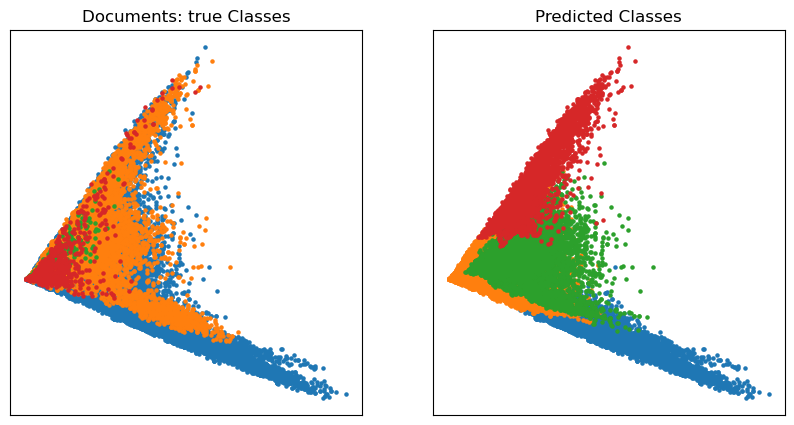

Cluster 0: traseira capa bateria tampa pecas cor camera celular substituicao telefone 
Cluster 1: drone bluetooth fio suporte ouvido celular wifi controle telefone camera 
Cluster 2: carregador cabo carregamento usb porta rapido tipo pecas bateria solar 
Cluster 3: transmissor adaptador receptor audio fio carro usb bluetooth microfone sistema 


In [6]:
vectorizer = TfidfVectorizer(min_df=5)
nome_tfidf = vectorizer.fit_transform(docs_nome)
kmeans_nome = KMeans(n_clusters=4, max_iter=500, n_init=1).fit(nome_tfidf)
predicted_targets = kmeans_nome.labels_

plot_docs_matrix(nome_tfidf,true_targets=true_targets,predicted_targets=predicted_targets)

order_centroids = kmeans_nome.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(4):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]} ", end="")
    print()

### Descrição

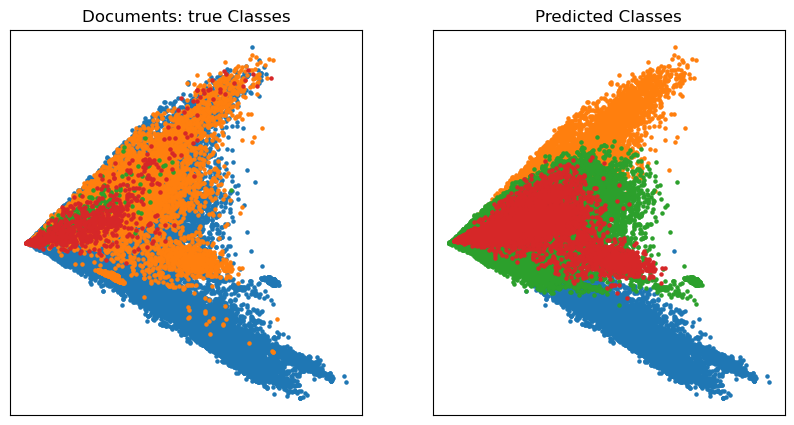

Cluster 0: traseira pecas antes substituicao bateria telefone celular tampa capa envio 
Cluster 1: bluetooth fio ouvido audio transmissor receptor adaptador fone som microfone 
Cluster 2: usb carregador cabo telefone carregamento suporte celular capa bateria fio 
Cluster 3: drone controle camera remoto rc webcam capa voo privacidade dji 


In [7]:
vectorizer = TfidfVectorizer(min_df=5)
descricao_tfidf = vectorizer.fit_transform(docs_descricao)
kmeans_desc = KMeans(n_clusters=4, max_iter=500, n_init=1).fit(descricao_tfidf)
predicted_targets = kmeans_desc.labels_

plot_docs_matrix(descricao_tfidf,true_targets=true_targets,predicted_targets=predicted_targets)

order_centroids = kmeans_desc.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(4):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]} ", end="")
    print()

## LSA

### Nome

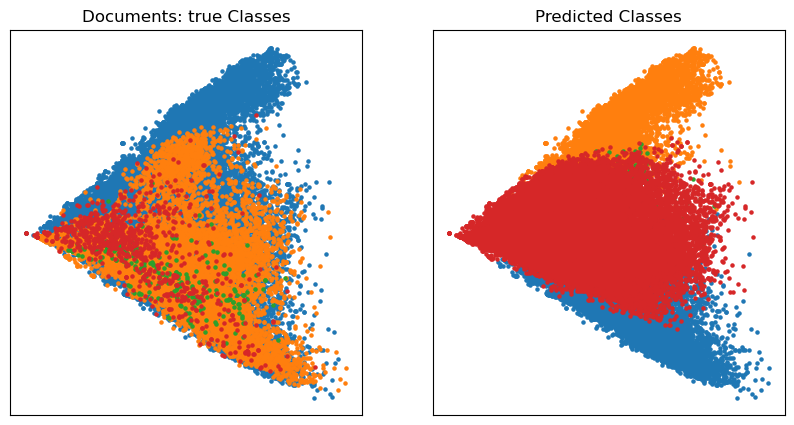

Cluster 0: 80m elegance artes decodificar conformacao atc 4096x2160 60x1 cientifica disco 
Cluster 1: a03s eletricidade 750kg dsl contorcer adaptativa automatica 99 a720 dlna 
Cluster 2: als ddr2 algumas channels cintilacao atirando barulho 99 cuidado cobertor 
Cluster 3: 9450s a305fn encerre a30s a720 escolhido docking duradero 750kg 99 


In [8]:
lsa = make_pipeline(TruncatedSVD(n_components=100), Normalizer(copy=False))
nome_lsa = lsa.fit_transform(nome_tfidf)
kmeans_lsa_nome = KMeans(n_clusters=4, max_iter=500, n_init=1).fit(nome_lsa)
predicted_targets = kmeans_lsa_nome.labels_
plot_docs_matrix(nome_lsa,true_targets=true_targets,predicted_targets=predicted_targets)

original_space_centroids = lsa[0].inverse_transform(kmeans_lsa_nome.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(4):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]} ", end="")
    print()
    

### Descrição

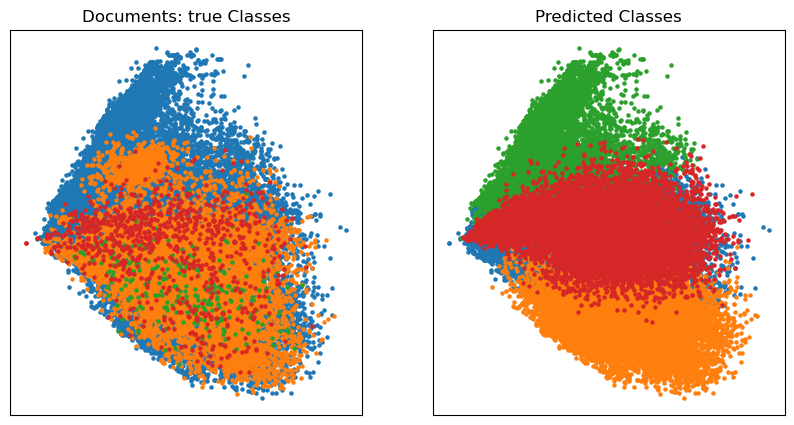

Cluster 0: wifi controle suporte remoto camera sinal fio tela pode tv 
Cluster 1: bluetooth ouvido fio audio som fone transmissor microfone receptor adaptador 
Cluster 2: capa telefone traseira celular pecas bateria tampa substituicao antes galaxy 
Cluster 3: drone carregador usb carregamento cabo bateria rc protecao rapido tipo 


In [9]:
lsa = make_pipeline(TruncatedSVD(n_components=100), Normalizer(copy=False))
descricao_lsa = lsa.fit_transform(descricao_tfidf)
kmeans_lsa_desc = KMeans(n_clusters=4, max_iter=500, n_init=1).fit(descricao_lsa)
predicted_targets = kmeans_lsa_desc.labels_
plot_docs_matrix(descricao_lsa,true_targets=true_targets,predicted_targets=predicted_targets)

original_space_centroids = lsa[0].inverse_transform(kmeans_lsa_desc.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(4):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]} ", end="")
    print()

## MiniBatchKMeans

### Nome

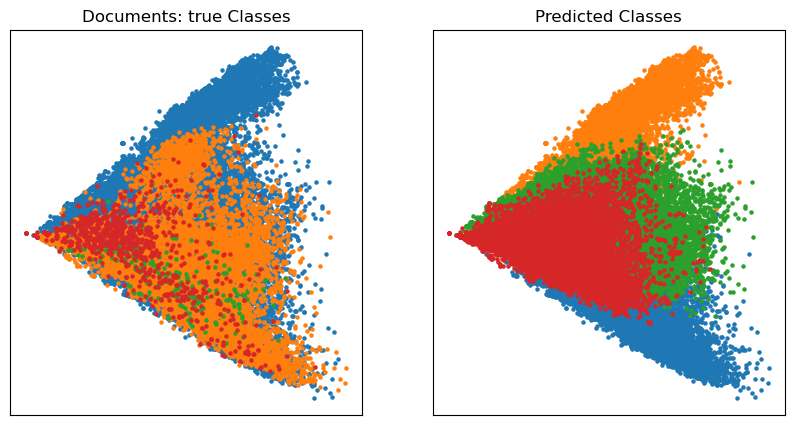

Cluster 0: usb fio carregador carregamento cabo adaptador transmissor receptor bluetooth suporte 
Cluster 1: capa telefone traseira bateria celular pecas tampa antes substituicao voce 
Cluster 2: cabo produtos voce mail duvida entrega contato alguma drone bluetooth 
Cluster 3: telefone suporte drone wifi receptor fio transmissor tv remoto carro 


In [10]:
minibatch_kmeans_nome = MiniBatchKMeans(n_clusters=4, n_init=1, init_size=1000, batch_size=1548).fit(nome_lsa)
predicted_targets = minibatch_kmeans_nome.labels_
plot_docs_matrix(nome_lsa,true_targets=true_targets,predicted_targets=predicted_targets)

original_space_centroids = lsa[0].inverse_transform(minibatch_kmeans_nome.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(4):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]} ", end="")
    print()

### Descrição

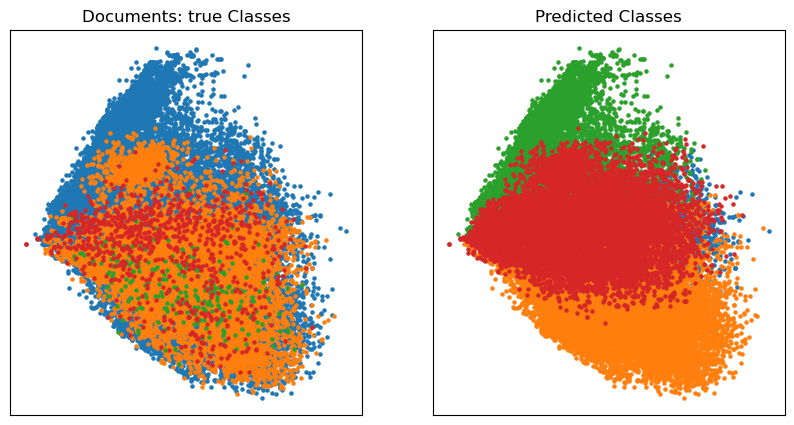

Cluster 0: carregador usb carregamento cabo bateria rapido tipo dados energia iphone 
Cluster 1: bluetooth fio ouvido audio transmissor som receptor adaptador fone microfone 
Cluster 2: telefone celular capa traseira pecas bateria xiaomi substituicao antes galaxy 
Cluster 3: drone controle camera remoto rc pode material facil motor carro 


In [11]:
minibatch_kmeans_desc = MiniBatchKMeans(n_clusters=4, n_init=1, init_size=1000, batch_size=1548).fit(descricao_lsa)
predicted_targets = minibatch_kmeans_desc.labels_
plot_docs_matrix(descricao_lsa,true_targets=true_targets,predicted_targets=predicted_targets)

original_space_centroids = lsa[0].inverse_transform(minibatch_kmeans_desc.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(4):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]} ", end="")
    print()

## KMeans Doc2Vec

In [12]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

docs_nome_vec = [TaggedDocument(doc, [i]) for i, doc in enumerate(docs_nome)]
docs_desc_vec = [TaggedDocument(doc, [i]) for i, doc in enumerate(docs_descricao)]

In [13]:
d2v_model_nome = Doc2Vec(docs_nome_vec, vector_size = 500, window = 10, min_count = 500, workers=7, dm = 1,alpha=0.025, min_alpha=0.001)
d2v_model_nome.train(docs_nome_vec, total_examples=d2v_model_nome.corpus_count, epochs=10, start_alpha=0.002, end_alpha=-0.016)

d2v_model_desc = Doc2Vec(docs_desc_vec, vector_size = 500, window = 10, min_count = 500, workers=7, dm = 1,alpha=0.025, min_alpha=0.001)
d2v_model_desc.train(docs_desc_vec, total_examples=d2v_model_desc.corpus_count, epochs=10, start_alpha=0.002, end_alpha=-0.016)

In [14]:
nome_d2v = np.array([d2v_model_nome.dv.get_vector(i) for i in range(len(d2v_model_nome.dv))])
desc_d2v = np.array([d2v_model_desc.dv.get_vector(i) for i in range(len(d2v_model_desc.dv))])

### Nome

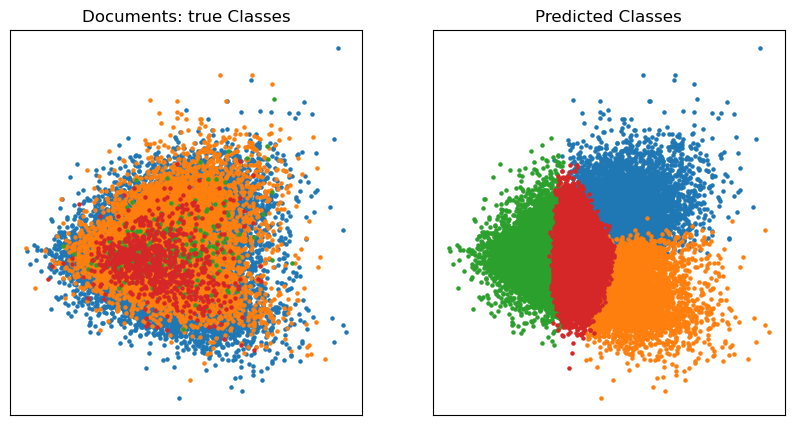

Cluster 0: 003 1000mah 0311 10khz 108mhz 150 10d 1024 12x18650 12pcs 
Cluster 1: 0311 1000mah 150 1024 10khz 1191 102 10x1 1333mhz 1440p 
Cluster 2: 003 159 150 1440p 1000mah 140mah 135deg 10khz 12x 1024 
Cluster 3: 1000mah 003 150 0311 10khz 1024 10x1 159 1440p 108mhz 


In [15]:
kmeans_nome_d2v = KMeans(n_clusters=4, max_iter=500, n_init=1).fit(nome_d2v)
predicted_targets = kmeans_nome_d2v.labels_

plot_docs_matrix(nome_d2v,true_targets=true_targets,predicted_targets=predicted_targets)

order_centroids = kmeans_nome_d2v.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(4):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]} ", end="")
    print()

### Descrição

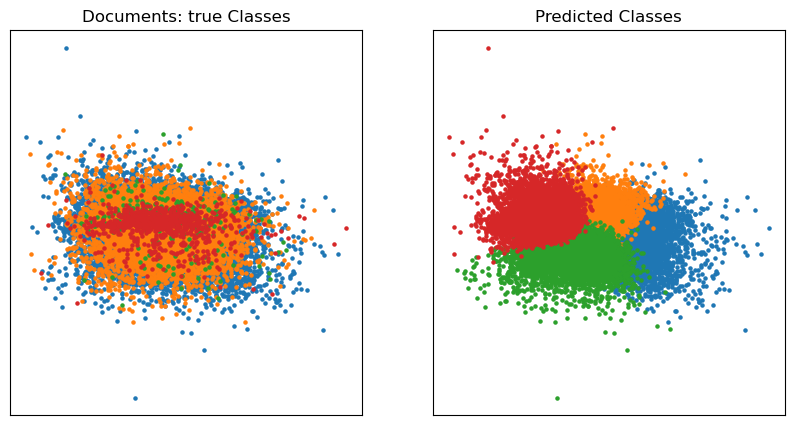

Cluster 0: 003 1000mah 0311 10khz 108mhz 150 10d 1024 12x18650 12pcs 
Cluster 1: 0311 1000mah 150 1024 10khz 1191 102 10x1 1333mhz 1440p 
Cluster 2: 003 159 150 1440p 1000mah 140mah 135deg 10khz 12x 1024 
Cluster 3: 1000mah 003 150 0311 10khz 1024 10x1 159 1440p 108mhz 


In [16]:
kmeans_desc_d2v = KMeans(n_clusters=4, max_iter=500, n_init=1).fit(desc_d2v)
predicted_targets = kmeans_desc_d2v.labels_

plot_docs_matrix(desc_d2v,true_targets=true_targets,predicted_targets=predicted_targets)

order_centroids = kmeans_nome_d2v.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(4):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]} ", end="")
    print()

## Comparação dos resultados

KMeans Descrição resultou em quantidade de itens por cluster mais próxima da classe real dos anúncios, assim, aparentemente, é a melhor escolha para classificação dentre aquelas experimentadas. Entretanto, as quantidades das classes 2 e 3 estão ainda muito superiores à quantidades verdadeiras.

In [17]:
# columns = [kmeans_nome, kmeans_desc, kmeans_lsa_nome, kmeans_lsa_desc, minibatch_kmeans_nome, minibatch_kmeans_desc]

clusters = {'KMeans Nome': kmeans_nome.labels_, 'KMeans Descrição': kmeans_desc.labels_, 
            'KMeans LSA Nome': kmeans_lsa_nome.labels_, 'KMeans LSA Descrição': kmeans_lsa_desc.labels_, 
            'Minibatch KMeans LSA Nome': minibatch_kmeans_nome.labels_, 'Minibatch KMeans LSA Descrição': minibatch_kmeans_desc.labels_,
            'KMeans Doc2Vec Nome': kmeans_nome_d2v.labels_, 'KMeans Doc2Vec Descrição': kmeans_desc_d2v.labels_, }

clusters_sizes = []
# print(f'Quantidade de documentos atribuídos a cada cluster:')
for cluster_name,cluster in clusters.items():
    _, cluster_size = np.unique(cluster, return_counts=True)
    cluster_info = ['> '+cluster_name]+['{:,d}'.format(s) for s in cluster_size]
    # cluster_info.extend(list(cluster_size))
    clusters_sizes.append(cluster_info)

_, category_sizes = np.unique(true_targets, return_counts=True)
category_sizes = ['{:,d}'.format(s) for s in category_sizes]
true_category_sizes = ['Quantidade real'] + category_sizes
clusters_sizes.append(true_category_sizes)
colalign=('left','right','right','right','right')

headers = ['Algoritmo', 'Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
print(tabulate(clusters_sizes,headers=headers,colalign=colalign,tablefmt='rounded_grid').replace(',','.'))

╭──────────────────────────────────┬─────────────┬─────────────┬─────────────┬─────────────╮
│ Algoritmo                        │   Cluster 0 │   Cluster 1 │   Cluster 2 │   Cluster 3 │
├──────────────────────────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ > KMeans Nome                    │       6.531 │      33.743 │       6.751 │       4.351 │
├──────────────────────────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ > KMeans Descrição               │       7.164 │       7.079 │      30.818 │       6.315 │
├──────────────────────────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ > KMeans LSA Nome                │      10.915 │       7.468 │       4.437 │      28.556 │
├──────────────────────────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ > KMeans LSA Descrição           │      18.478 │       8.950 │      12.685 │      11.263 │
├──────────────────────────────────┼─────────────┼─────────────┼──────

# Outros experimentos

In [18]:
# %matplotlib widget

# from matplotlib import cm
# from mpl_toolkits.mplot3d import Axes3D

# pca = TruncatedSVD(n_components=3)
# pca_matrix = pca.fit_transform(nome_tfidf)
# scatter_x = pca_matrix[:, 0] # first principle component
# scatter_y = pca_matrix[:, 1] # second principle component
# scatter_z = pca_matrix[:, 2] # second principle component


# # creating figure
# fig = plt.figure()
# ax = Axes3D(fig)

# # =============
# # First subplot
# # =============
# # set up the axes for the first plot
# ax = fig.add_subplot(1, 2, 1, projection='3d')

# for group in np.unique(true_targets):
#     ix = np.where(true_targets == group)
#     ax.scatter(scatter_z[ix], scatter_x[ix], scatter_y[ix], label=group,  cmap=cm.coolwarm, s=5)

# # ==============
# # Second subplot
# # ==============
# # set up the axes for the second plot
# ax = fig.add_subplot(1, 2, 2, projection='3d')

# for group in np.unique(true_targets):
#     ix = np.where(true_targets == group)
#     ax.scatter(scatter_x[ix], scatter_y[ix], scatter_z[ix], label=group, s=5)

    
# plt.show()